# Anaylizing the Tiatinc Survial Record
## By: Aaron Pelton  Date: September 28, 2024
## A review of those who lived through the titanic accident. The project examines the ages of surviors and those lost.  The project also considers what class the passagners were in.

In [930]:
import jupyterlab
import numpy
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns

In [931]:
# Load the Titanic dataset into DataFrame
df = sns.load_dataset('titanic')

# Inspect first rows of the DataFrame
print(df.head(100))

    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
..       ...     ...     ...   ...    ...    ...      ...      ...     ...   
95         0       3    male   NaN      0      0   8.0500        S   Third   
96         0       1    male  71.0      0      0  34.6542        C   First   
97         1       1    male  23.0      0      1  63.3583        C   First   
98         1       2  female  34.0      0      1  23.0000        S  Second   
99         0       2    male  34.0      1      0  26.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
0     ma

In [932]:

print(df.shape)
#print(df.dtypes)

(891, 15)


In [933]:
# Count the number of female passengers
fcount = (df['sex'] == 'female').sum()  
print(f"Number of females: {fcount}")

Number of females: 314


In [934]:
# Count the number of male passengers
mcount = (df['sex'] == 'male').sum()  
print(f"Number of males: {mcount}")

Number of males: 577


In [935]:
# Count the number of children passengers
ccount = (df['who'] == 'child').sum()  
print(f"Number of children: {ccount}")

Number of children: 83


In [936]:
# Count the totals by classification

allf = (df['sex'] == 'female').sum()
allm = (df['sex'] == 'male').sum()
allpas = allf + allm
alld = (df['survived'] == 0).sum()
allfs = ((df['sex'] == 'female') & (df['survived'] == 1)).sum()
allms = ((df['sex'] == 'male') & (df['survived'] == 1)).sum()
allfd = ((df['sex'] == 'female') & (df['survived'] == 0)).sum()
allmd = ((df['sex'] == 'male') & (df['survived'] == 0)).sum()
all1sts = ((df['class'] == 'First') & (df['survived'] == 1)).sum()
all2nds = ((df['class'] == 'Second') & (df['survived'] == 1)).sum()
all3rds = ((df['class'] == 'Third') & (df['survived'] == 1)).sum()
all1std = ((df['class'] == 'First') & (df['survived'] == 0)).sum()
all2ndd = ((df['class'] == 'Second') & (df['survived'] == 0)).sum()
all3rdd = ((df['class'] == 'Third') & (df['survived'] == 0)).sum()

print(f" Total Numbers of Passengers: {allpas} ")
print(f" Number of female passengers: {allf} ")
print(f" Number of male passengers: {allm} ")
print(f" Number of survivers: {alls} ")
print(f" Number of missing: {alld} ")
print(f" Number of surviving female passengers: {allfs} ")
print(f" Number of surviving male passengers:{allms} ")
print(f" Number of missing female passengers: {allfd} ")
print(f" Number of missing male passengers: {allmd}")
print(f" Number of passegners surviving 1st class: {all1sts}")
print(f" Number of passegners surviving 2nd class: {all2nds}")
print(f" Number of passegners surviving 3rd class: {all3rds}")
print(f" Number of passegners missing 1st class: {all1std}")
print(f" Number of passegners missing 2nd class: {all2ndd}")
print(f" Number of passegners missing 3rd class: {all3rdd}")

 Total Numbers of Passengers: 891 
 Number of female passengers: 314 
 Number of male passengers: 577 
 Number of survivers: 342 
 Number of missing: 549 
 Number of surviving female passengers: 233 
 Number of surviving male passengers:109 
 Number of missing female passengers: 81 
 Number of missing male passengers: 468
 Number of passegners surviving 1st class: 136
 Number of passegners surviving 2nd class: 87
 Number of passegners surviving 3rd class: 119
 Number of passegners missing 1st class: 80
 Number of passegners missing 2nd class: 97
 Number of passegners missing 3rd class: 372


In [937]:
# Count of the number of children with ages between 0 and 15
age15 = ((df['age'] >= 0) & (df['age'] <= 15)).sum()
age15f = ((df['sex'] == 'female') & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15m = ((df['sex'] == 'male') & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15s = ((df['survived'] == 1) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15d = ((df['survived'] == 0) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15fs = ((df['sex'] == 'female') & (df['survived'] == 1) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15ms = ((df['sex'] == 'male') & (df['survived'] == 1) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15fd = ((df['sex'] == 'female') & (df['survived'] == 0) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age15md = ((df['sex'] == 'male') & (df['survived'] == 0) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age151sts = ((df['class'] == 'First') & (df['survived'] == 1) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age152nds = ((df['class'] == 'Second') & (df['survived'] == 1) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age153rds = ((df['class'] == 'Third') & (df['survived'] == 1) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age151std = ((df['class'] == 'First') & (df['survived'] == 0) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age152ndd = ((df['class'] == 'Second') & (df['survived'] == 0) & (df['age'] >= 0) & (df['age'] <= 15)).sum()
age153rdd = ((df['class'] == 'Third') & (df['survived'] == 0) & (df['age'] >= 0) & (df['age'] <= 15)).sum()

print(f" Number of children: {age15} ")
print(f" Number of girs: {age15f} ")
print(f" Number of boys: {age15m} ")
print(f" Number of surviving children: {age15s} ")
print(f" Number of missing children: {age15d} ")
print(f" Number of surviving girls: {age15fs} ")
print(f" Number of surviving boys: {age15ms} ")
print(f" Number of missing girls: {age15fd} ")
print(f" Number of missing boys: {age15md}")
print(f" Number of children surviving 1st class: {age151sts}")
print(f" Number of children surviving 2nd class: {age152nds}")
print(f" Number of children surviving 3rd class: {age153rds}")
print(f" Number of children missing 1st class: {age151std}")
print(f" Number of children missing 2nd class: {age152ndd}")
print(f" Number of children missing 3rd class: {age153rdd}")

 Number of children: 83 
 Number of girs: 43 
 Number of boys: 40 
 Number of surviving children: 49 
 Number of missing children: 34 
 Number of surviving girls: 28 
 Number of surviving boys: 21 
 Number of missing girls: 15 
 Number of missing boys: 19
 Number of children surviving 1st class: 5
 Number of children surviving 2nd class: 19
 Number of children surviving 3rd class: 25
 Number of children missing 1st class: 1
 Number of children missing 2nd class: 0
 Number of children missing 3rd class: 33


In [938]:
# Count of the number of young adults with ages between 16 and 30
age30 = ((df['age'] >= 16) & (df['age'] <= 30)).sum()
age30f = ((df['sex'] == 'female') & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30m = ((df['sex'] == 'male') & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30s = ((df['survived'] == 1) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30d = ((df['survived'] == 0) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30fs = ((df['sex'] == 'female') & (df['survived'] == 1) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30ms = ((df['sex'] == 'male') & (df['survived'] == 1) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30fd = ((df['sex'] == 'female') & (df['survived'] == 0) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age30md = ((df['sex'] == 'male') & (df['survived'] == 0) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age301sts = ((df['class'] == 'First') & (df['survived'] == 1) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age302nds = ((df['class'] == 'Second') & (df['survived'] == 1) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age303rds = ((df['class'] == 'Third') & (df['survived'] == 1) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age301std = ((df['class'] == 'First') & (df['survived'] == 0) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age302ndd = ((df['class'] == 'Second') & (df['survived'] == 0) & (df['age'] >=16) & (df['age'] <= 30)).sum()
age303rdd = ((df['class'] == 'Third') & (df['survived'] == 0) & (df['age'] >= 16) & (df['age'] <= 30)).sum()

print(f" Number of young adults: {age30} ")
print(f" Number of young women: {age30f} ")
print(f" Number of young men: {age30m} ")
print(f" Number of surviving young adults: {age30s} ")
print(f" Number of missing young adults: {age30d} ")
print(f" Number of surviving young women: {age30fs} ")
print(f" Number of surviving young men: {age30ms} ")
print(f" Number of missing young women: {age30fd} ")
print(f" Number of missing young men: {age30md}")
print(f" Number of young adults surviving 1st class: {age301sts}")
print(f" Number of young adults surviving 2nd class: {age302nds}")
print(f" Number of young adults surviving 3rd class: {age303rds}")
print(f" Number of young adults missing 1st class: {age301std}")
print(f" Number of young adults missing 2nd class: {age302ndd}")
print(f" Number of young adults missing 3rd class: {age303rdd}")


 Number of young adults: 326 
 Number of young women: 115 
 Number of young men: 211 
 Number of surviving young adults: 117 
 Number of missing young adults: 209 
 Number of surviving young women: 86 
 Number of surviving young men: 31 
 Number of missing young women: 29 
 Number of missing young men: 180
 Number of young adults surviving 1st class: 41
 Number of young adults surviving 2nd class: 32
 Number of young adults surviving 3rd class: 44
 Number of young adults missing 1st class: 14
 Number of young adults missing 2nd class: 45
 Number of young adults missing 3rd class: 150


In [939]:
# Count of the number of adults with ages between 31 and 45
age45 = ((df['age'] >= 31) & (df['age'] <= 45)).sum()
age45f = ((df['sex'] == 'female') & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45m = ((df['sex'] == 'male') & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45s = ((df['survived'] == 1) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45d = ((df['survived'] == 0) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45fs = ((df['sex'] == 'female') & (df['survived'] == 1) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45ms = ((df['sex'] == 'male') & (df['survived'] == 1) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45fd = ((df['sex'] == 'female') & (df['survived'] == 0) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age45md = ((df['sex'] == 'male') & (df['survived'] == 0) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age451sts = ((df['class'] == 'First') & (df['survived'] == 1) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age452nds = ((df['class'] == 'Second') & (df['survived'] == 1) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age453rds = ((df['class'] == 'Third') & (df['survived'] == 1) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age451std = ((df['class'] == 'First') & (df['survived'] == 0) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age452ndd = ((df['class'] == 'Second') & (df['survived'] == 0) & (df['age'] >=31) & (df['age'] <= 45)).sum()
age453rdd = ((df['class'] == 'Third') & (df['survived'] == 0) & (df['age'] >= 31) & (df['age'] <= 45)).sum()

print(f" Number of adults: {age45} ")
print(f" Number of women: {age45f} ")
print(f" Number of men: {age45m} ")
print(f" Number of surviving adults: {age45s} ")
print(f" Number of missing adults: {age45d} ")
print(f" Number of surviving women: {age45fs} ")
print(f" Number of surviving men: {age45ms} ")
print(f" Number of missing women: {age45fd} ")
print(f" Number of missing men: {age45md}")
print(f" Number of adults surviving 1st class: {age451sts}")
print(f" Number of adults surviving 2nd class: {age452nds}")
print(f" Number of adults surviving 3rd class: {age453rds}")
print(f" Number of adults missing 1st class: {age451std}")
print(f" Number of adults missing 2nd class: {age452ndd}")
print(f" Number of adults missing 3rd class: {age453rdd}")

 Number of adults: 200 
 Number of women: 72 
 Number of men: 128 
 Number of surviving adults: 86 
 Number of missing adults: 114 
 Number of surviving women: 57 
 Number of surviving men: 29 
 Number of missing women: 15 
 Number of missing men: 99
 Number of adults surviving 1st class: 46
 Number of adults surviving 2nd class: 25
 Number of adults surviving 3rd class: 15
 Number of adults missing 1st class: 17
 Number of adults missing 2nd class: 29
 Number of adults missing 3rd class: 68


In [940]:
# Count of the number of adults with ages between 46 and 60
age60 = ((df['age'] >= 46) & (df['age'] <= 60)).sum()
age60f = ((df['sex'] == 'female') & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60m = ((df['sex'] == 'male') & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60s = ((df['survived'] == 1) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60d = ((df['survived'] == 0) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60fs = ((df['sex'] == 'female') & (df['survived'] == 1) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60ms = ((df['sex'] == 'male') & (df['survived'] == 1) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60fd = ((df['sex'] == 'female') & (df['survived'] == 0) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age60md = ((df['sex'] == 'male') & (df['survived'] == 0) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age601sts = ((df['class'] == 'First') & (df['survived'] == 1) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age602nds = ((df['class'] == 'Second') & (df['survived'] == 1) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age603rds = ((df['class'] == 'Third') & (df['survived'] == 1) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age601std = ((df['class'] == 'First') & (df['survived'] == 0) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age602ndd = ((df['class'] == 'Second') & (df['survived'] == 0) & (df['age'] >=46) & (df['age'] <= 60)).sum()
age603rdd = ((df['class'] == 'Third') & (df['survived'] == 0) & (df['age'] >= 46) & (df['age'] <= 60)).sum()

print(f" Number of adults: {age60} ")
print(f" Number of women: {age60f} ")
print(f" Number of men: {age60m} ")
print(f" Number of surviving adults: {age60s} ")
print(f" Number of missing adults: {age60d} ")
print(f" Number of surviving women: {age60fs} ")
print(f" Number of surviving men: {age60ms} ")
print(f" Number of missing women: {age60fd} ")
print(f" Number of missing men: {age60md}")
print(f" Number of adults surviving 1st class: {age601sts}")
print(f" Number of adults surviving 2nd class: {age602nds}")
print(f" Number of adults surviving 3rd class: {age603rds}")
print(f" Number of adults missing 1st class: {age601std}")
print(f" Number of adults missing 2nd class: {age602ndd}")
print(f" Number of adults missing 3rd class: {age603rdd}")

 Number of adults: 79 
 Number of women: 27 
 Number of men: 52 
 Number of surviving adults: 33 
 Number of missing adults: 46 
 Number of surviving women: 23 
 Number of surviving men: 10 
 Number of missing women: 4 
 Number of missing men: 42
 Number of adults surviving 1st class: 27
 Number of adults surviving 2nd class: 6
 Number of adults surviving 3rd class: 0
 Number of adults missing 1st class: 20
 Number of adults missing 2nd class: 14
 Number of adults missing 3rd class: 12


In [941]:
# Count of the number of adults with ages between 61 and 80
age80 = ((df['age'] >= 61) & (df['age'] <= 80)).sum()
age80f = ((df['sex'] == 'female') & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80m = ((df['sex'] == 'male') & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80s = ((df['survived'] == 1) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80d = ((df['survived'] == 0) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80fs = ((df['sex'] == 'female') & (df['survived'] == 1) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80ms = ((df['sex'] == 'male') & (df['survived'] == 1) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80fd = ((df['sex'] == 'female') & (df['survived'] == 0) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age80md = ((df['sex'] == 'male') & (df['survived'] == 0) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age801sts = ((df['class'] == 'First') & (df['survived'] == 1) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age802nds = ((df['class'] == 'Second') & (df['survived'] == 1) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age803rds = ((df['class'] == 'Third') & (df['survived'] == 1) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age801std = ((df['class'] == 'First') & (df['survived'] == 0) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age802ndd = ((df['class'] == 'Second') & (df['survived'] == 0) & (df['age'] >=61) & (df['age'] <= 80)).sum()
age803rdd = ((df['class'] == 'Third') & (df['survived'] == 0) & (df['age'] >= 61) & (df['age'] <= 80)).sum()

print(f" Number of adults: {age80} ")
print(f" Number of women: {age80f} ")
print(f" Number of men: {age80m} ")
print(f" Number of surviving adults: {age80s} ")
print(f" Number of missing adults: {age80d} ")
print(f" Number of surviving women: {age80fs} ")
print(f" Number of surviving men: {age80ms} ")
print(f" Number of missing women: {age80fd} ")
print(f" Number of missing men: {age80md}")
print(f" Number of adults surviving 1st class: {age801sts}")
print(f" Number of adults surviving 2nd class: {age802nds}")
print(f" Number of adults surviving 3rd class: {age803rds}")
print(f" Number of adults missing 1st class: {age801std}")
print(f" Number of adults missing 2nd class: {age802ndd}")
print(f" Number of adults missing 3rd class: {age803rdd}")

 Number of adults: 22 
 Number of women: 3 
 Number of men: 19 
 Number of surviving adults: 5 
 Number of missing adults: 17 
 Number of surviving women: 3 
 Number of surviving men: 2 
 Number of missing women: 0 
 Number of missing men: 17
 Number of adults surviving 1st class: 3
 Number of adults surviving 2nd class: 1
 Number of adults surviving 3rd class: 1
 Number of adults missing 1st class: 11
 Number of adults missing 2nd class: 2
 Number of adults missing 3rd class: 4


In [942]:
# Count the number of adults with ages between 61 and 80
agenone =  df['age'].isna().sum() + (df['age'] == "").sum() 
agenonef = df[(df['sex'] == 'female') & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenonem = df[(df['sex'] == 'male') & (df['age'].isna() | (df['age'] == ""))].shape[0]

#agenonem = ((df['sex'] == 'male') & df['age'].isna().sum() + (df['age'] == "")).sum()
agenones = df[(df['survived'] == 1) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenoned  = df[(df['survived'] == 0) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenonefs = df[(df['sex'] == 'female') & (df['survived'] == 1) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenonems = df[(df['sex'] == 'male') & (df['survived'] == 1) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenonefd = df[(df['sex'] == 'female') & (df['survived'] == 0) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenonemd = df[(df['sex'] == 'male') & (df['survived'] == 0) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenone1sts = df[(df['class'] == 'First') & (df['survived'] == 1) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenone2nds = df[(df['class'] == 'Second') & (df['survived'] == 1) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenone3rds = df[(df['class'] == 'Third') & (df['survived'] == 1) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenone1std = df[(df['class'] == 'First') & (df['survived'] == 0) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenone2ndd = df[(df['class'] == 'Second') & (df['survived'] == 0) & (df['age'].isna() | (df['age'] == ""))].shape[0]
agenone3rdd = df[(df['class'] == 'Third') & (df['survived'] == 0) & (df['age'].isna() | (df['age'] == ""))].shape[0]

print(f" Number of adults with no age recorded: {agenone} ")
print(f" Number of women with no age recorded: {agenonef} ")
print(f" Number of men with no age recorded: {agenonem} ")
print(f" Number of surviving adults with no age recorded: {agenones} ")
print(f" Number of missing adults with no age recorded: {agenoned} ")
print(f" Number of surviving women with no age recorded: {agenonefs} ")
print(f" Number of surviving men with no age recorded: {agenonems} ")
print(f" Number of missing women with no age recorded: {agenonefd} ")
print(f" Number of missing men with not age recorded: {agenonemd}")
print(f" Number of adults surviving 1st class with no age recorded: {agenone1sts}")
print(f" Number of adults surviving 2nd class with no age recorded: {agenone2nds}")
print(f" Number of adults surviving 3rd class with no age recorded: {agenone3rds}")
print(f" Number of adults missing 1st class with no age recorded: {agenone1std}")
print(f" Number of adults missing 2nd class with no age recorded: {agenone2ndd}")
print(f" Number of adults missing 3rd class with no age recorded: {agenone3rdd}")

 Number of adults with no age recorded: 177 
 Number of women with no age recorded: 53 
 Number of men of men with not age recorded: 124 
 Number of surviving adults with no age recorded: 52 
 Number of missing adults with no age recorded: 125 
 Number of surviving women with no age recorded: 36 
 Number of surviving men with no age recorded: 16 
 Number of missing women with no age recorded: 17 
 Number of missing men with not age recorded: 108
 Number of adults surviving 1st class with no age recorded: 14
 Number of adults surviving 2nd class with no age recorded: 4
 Number of adults surviving 3rd class with no age recorded: 34
 Number of adults missing 1st class with no age recorded: 16
 Number of adults missing 2nd class with no age recorded: 7
 Number of adults missing 3rd class with no age recorded: 102


In [943]:
# Example DataFrame
data = {
    'Age Group': ['Age 1 - 15', 'Age 16 - 30', 'Age 31 - 45', 'Age 46 - 60', 'Age 61 - 80', 'No Age Recorded'],
    'Count': [age15, age30, age45, age60, age80, agenone]
}
df = pd.DataFrame(data)

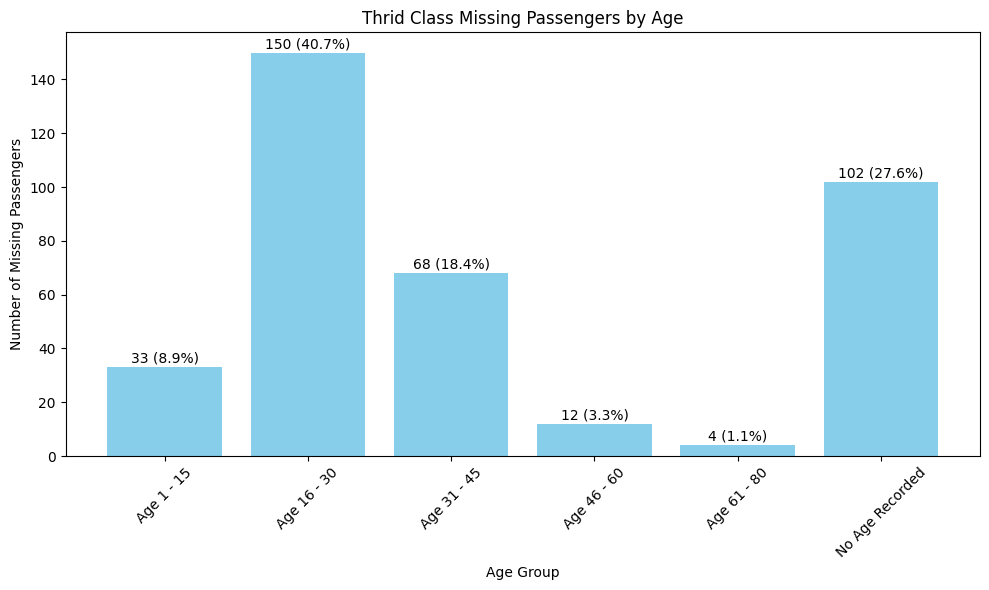

In [970]:
# Example DataFrame
data = {
    'Age Group': ['Age 1 - 15', 'Age 16 - 30', 'Age 31 - 45', 'Age 46 - 60', 'Age 61 - 80', 'No Age Recorded'],
    'Count': [age153rdd, age303rdd, age453rdd, age603rdd, age803rdd, agenone3rdd]
}
df = pd.DataFrame(data)

# Create a larger figure
plt.figure(figsize=(10, 6)) 
 
# Calculate total count and percentages
total_count = df['Count'].sum()
df['Percentage'] = (df['Count'] / total_count) * 100

# Create the bar chart
plt.bar(df['Age Group'], df['Count'], color='skyblue')

# Add count and percentage labels on top of the bars
for index, row in df.iterrows():
    plt.text(row['Age Group'], row['Count'] + 0.5, 
             f"{row['Count']} ({row['Percentage']:.1f}%)", 
             ha='center', va='bottom')
    
plt.bar(df['Age Group'], df['Count'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Missing Passengers')
plt.title('Thrid Class Missing Passengers by Age')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

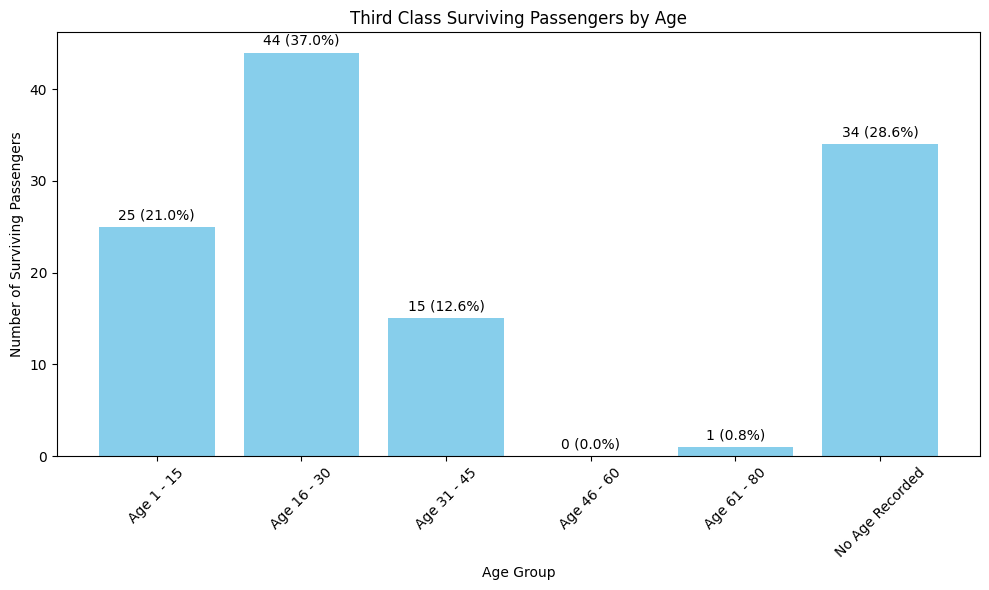

In [967]:
# Example DataFrame
data = {
    'Age Group': ['Age 1 - 15', 'Age 16 - 30', 'Age 31 - 45', 'Age 46 - 60', 'Age 61 - 80', 'No Age Recorded'],
    'Count': [age153rds, age303rds, age453rds, age603rds, age803rds, agenone3rds]
}
df = pd.DataFrame(data)
# Create a larger figure
plt.figure(figsize=(10, 6)) 

# Calculate total count and percentages
total_count = df['Count'].sum()
df['Percentage'] = (df['Count'] / total_count) * 100

# Create the bar chart
plt.bar(df['Age Group'], df['Count'], color='skyblue')

# Add count and percentage labels on top of the bars
for index, row in df.iterrows():
    plt.text(row['Age Group'], row['Count'] + 0.5, 
             f"{row['Count']} ({row['Percentage']:.1f}%)", 
             ha='center', va='bottom')
    
plt.bar(df['Age Group'], df['Count'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Surviving Passengers')
plt.title('Third Class Surviving Passengers by Age')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

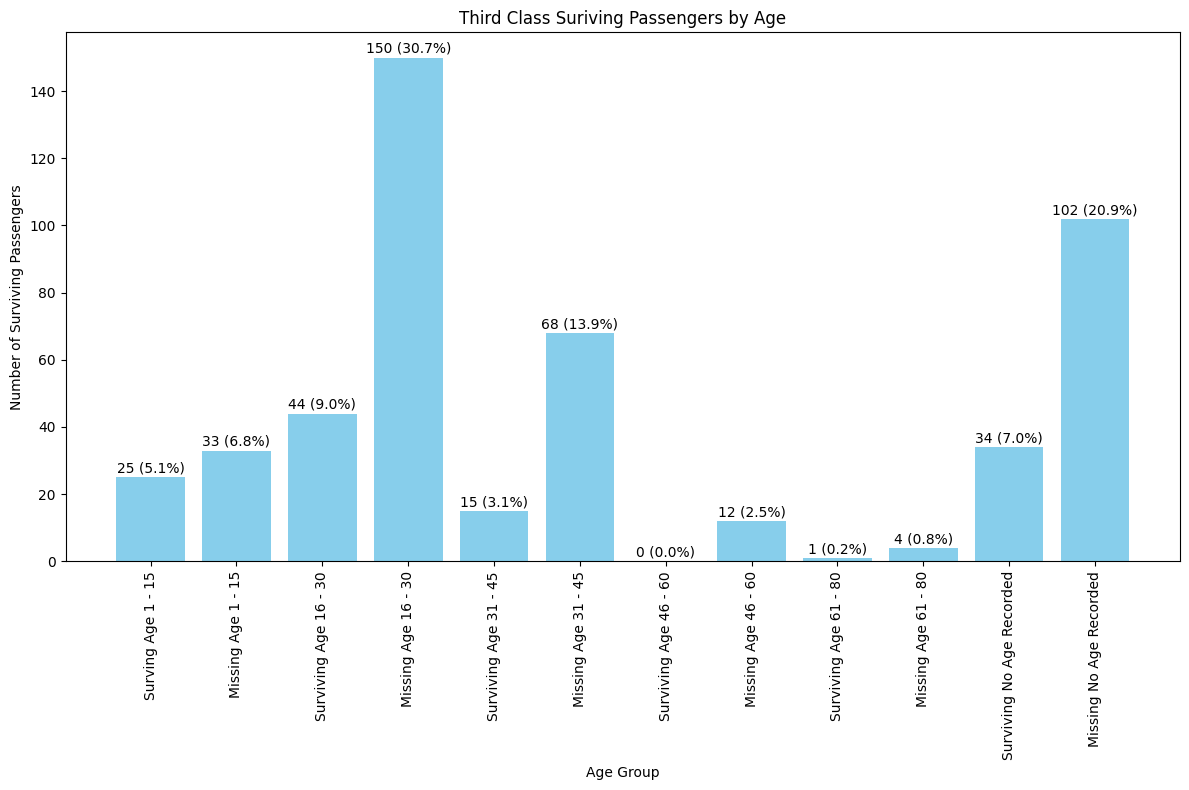

In [973]:
# Example DataFrame
data = {
    'Age Group': ['Surving Age 1 - 15', 'Missing Age 1 - 15','Surviving Age 16 - 30', 'Missing Age 16 - 30','Surviving Age 31 - 45', 'Missing Age 31 - 45','Surviving Age 46 - 60', 'Missing Age 46 - 60','Surviving Age 61 - 80', 'Missing Age 61 - 80','Surviving No Age Recorded','Missing No Age Recorded'],
    'Count': [age153rds, age153rdd, age303rds, age303rdd, age453rds, age453rdd, age603rds, age603rdd, age803rds, age803rdd, agenone3rds, agenone3rdd]
}
df = pd.DataFrame(data)

# Create a larger figure
plt.figure(figsize=(12, 8))  
# Calculate total count and percentages
total_count = df['Count'].sum()
df['Percentage'] = (df['Count'] / total_count) * 100

# Create the bar chart
plt.bar(df['Age Group'], df['Count'], color='skyblue')

# Add count and percentage labels on top of the bars
for index, row in df.iterrows():
    plt.text(row['Age Group'], row['Count'] + 0.5, 
             f"{row['Count']} ({row['Percentage']:.1f}%)", 
             ha='center', va='bottom')


plt.bar(df['Age Group'], df['Count'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Surviving Passengers')
plt.title('Third Class Suriving Passengers by Age')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()